In [48]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
import matplotlib.pyplot as plt #для визуализации

# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/686ad91a465b883d679beee67dd2600a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


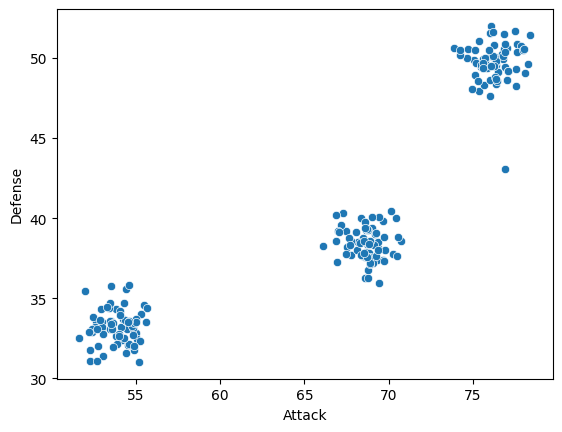

In [49]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(data=df, x='Attack', y='Defense');

n_clusters — количество кластеров;  
init — стратегия кластеризации;  
n_init — количество запусков алгоритма k-means;  
random_state — чтобы результаты воспроизводились от запуска к запуску.  

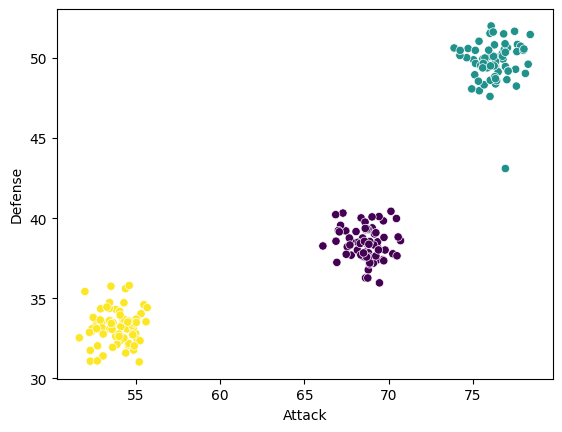

In [50]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(data=df, x='Attack', y='Defense', c=predictions);

In [51]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

напишем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции

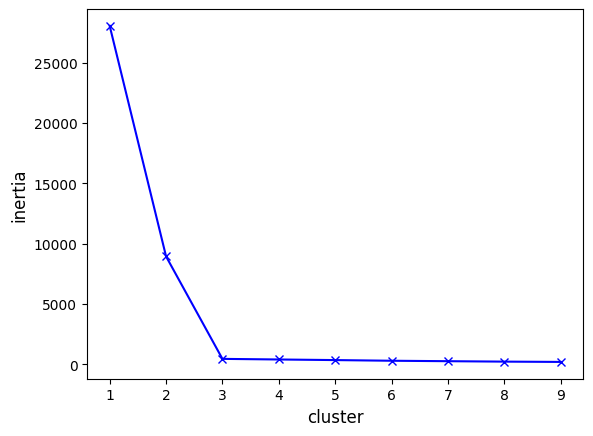

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
    # инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, n_init='auto', random_state=42)
    # запускаем алгоритм k-means
    k_means.fit(X)
    # находим значение инерции
    inertia = k_means.inertia_
    # возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []

X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))
    # визуализируем, как менялась инерция в зависимости от количества кластеров

# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-');

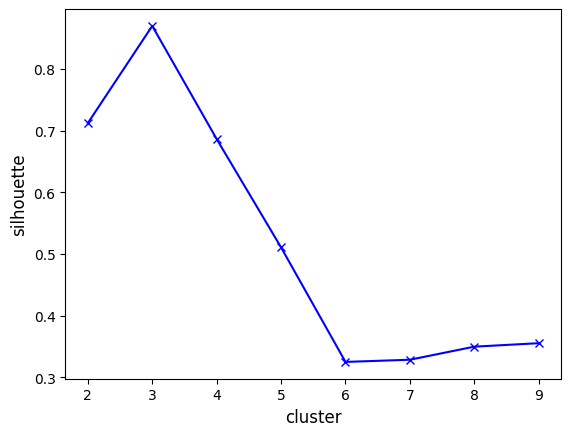

In [53]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

Задание 2.7

In [44]:
data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/89b083afa0b2aa24e00b10aaa523fbce/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/values_from_the_instrument.zip')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


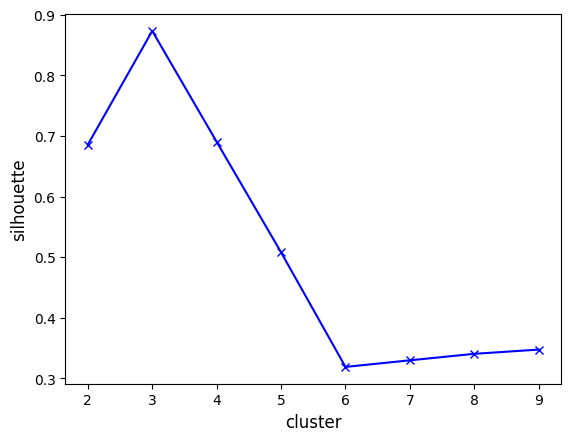

In [55]:
X = data

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

<AxesSubplot: xlabel='x1', ylabel='x2'>

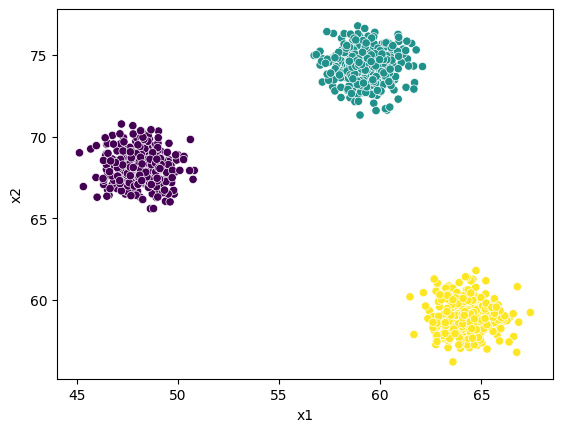

In [62]:
kmeans =  KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)
predictions = kmeans.predict(X)
predictions = kmeans.labels_
sns.scatterplot(data=X, x='x1', y='x2', c=predictions)